## Importing Libraries

In [10]:
import numpy as np
import pandas as pd
from Model_Parent_2 import *
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor
import os

## Importing Data

In [11]:
df = pd.read_csv("../cleaned_data/AirQualityUCI_fixed_cleaned.csv", index_col=0)

In [12]:
df

,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S5(O3),T,RH,AH,PT08.S4(NO2)
0,0.0,1360.0,11.9,1046.0,1056.0,1268.0,13.6,48.9,0.7578,1692.0
1,1.0,1292.0,9.4,955.0,1174.0,972.0,13.3,47.7,0.7255,1559.0
2,2.0,1402.0,9.0,939.0,1140.0,1074.0,11.9,54.0,0.7502,1555.0
3,3.0,1376.0,9.2,948.0,1092.0,1203.0,11.0,60.0,0.7867,1584.0
4,4.0,1272.0,6.5,836.0,1205.0,1110.0,11.2,59.6,0.7888,1490.0
...,...,...,...,...,...,...,...,...,...,...
8986,9352.0,1314.0,13.5,1101.0,539.0,1729.0,21.9,29.3,0.7568,1374.0
8987,9353.0,1163.0,11.4,1027.0,604.0,1269.0,24.3,23.7,0.7119,1264.0
8988,9354.0,1142.0,12.4,1063.0,603.0,1092.0,26.9,18.3,0.6406,1241.0
8989,9355.0,1003.0,9.5,961.0,702.0,770.0,28.3,13.5,0.5139,1041.0


## Breaking Data in X and y

In [13]:
X = df.iloc[:,:-1]

In [14]:
y = df.iloc[:,-1]

## Generating Models

### Linear Regression

In [15]:
lr = linear_model.LinearRegression()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:56:30   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          101

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:184: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


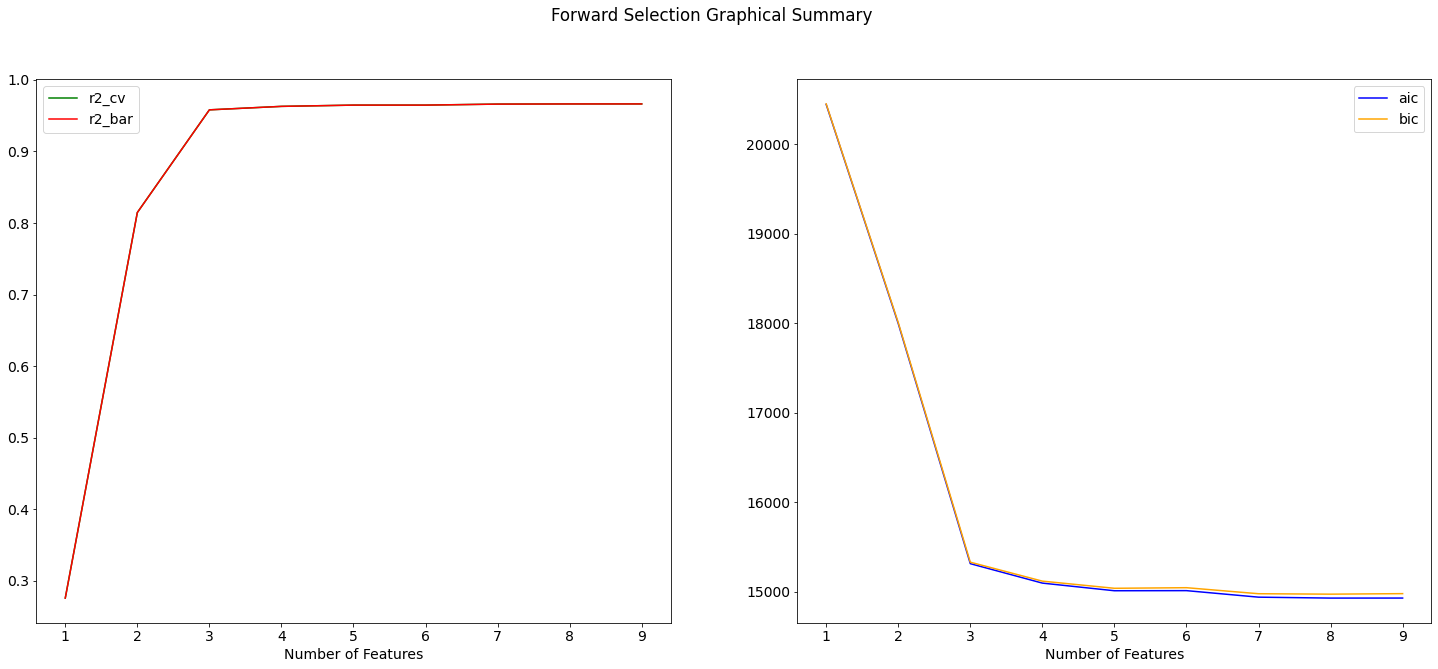

In [16]:
forwardSelection(lr, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:57:01   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:286: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


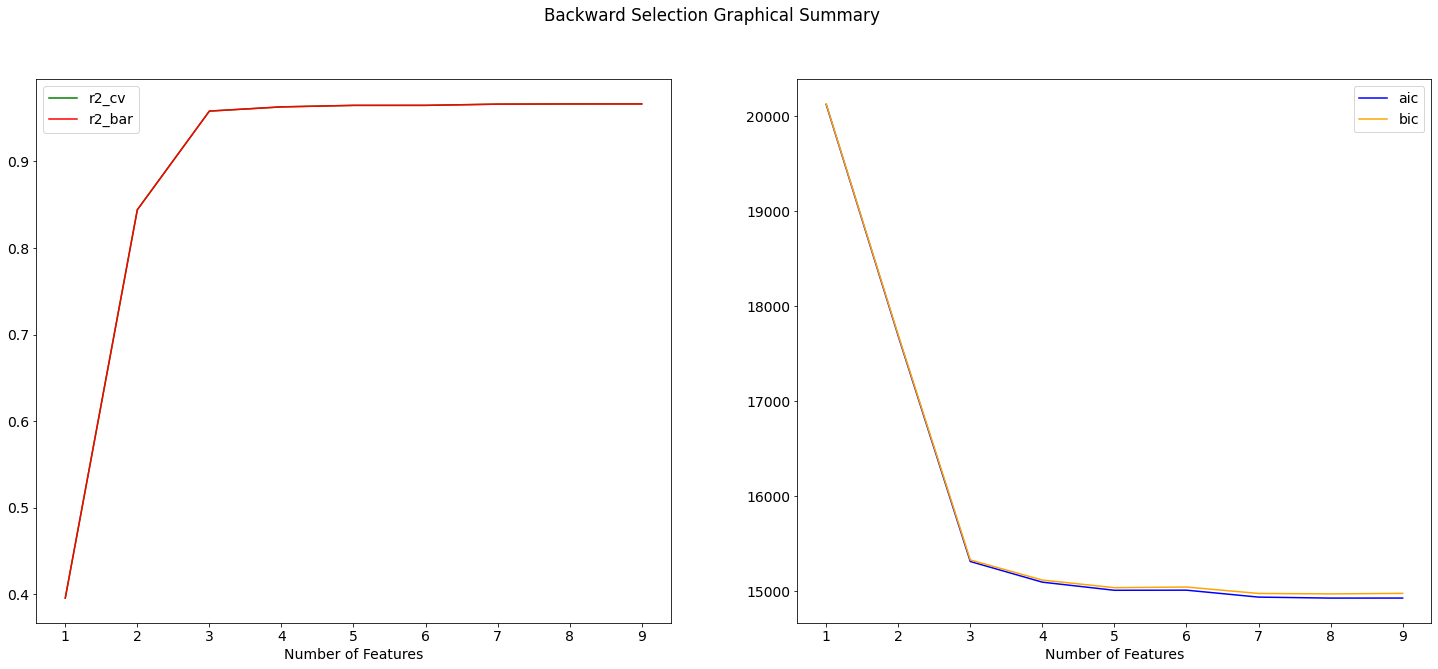

In [17]:
backwardSelection(lr, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:57:31   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:406: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


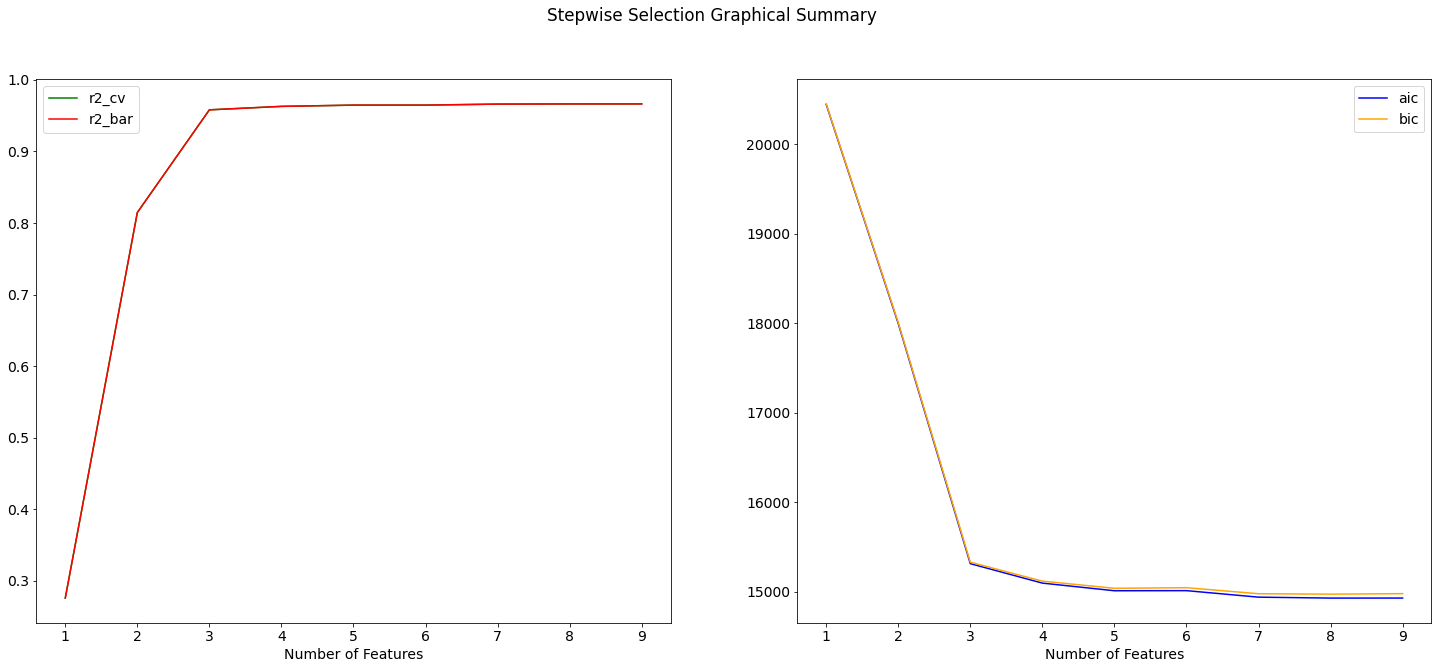

In [18]:
stepwiseSelection(lr, X, y)

### Ridge Regression

In [19]:
ridge = linear_model.Ridge()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:58:01   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          101

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:184: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


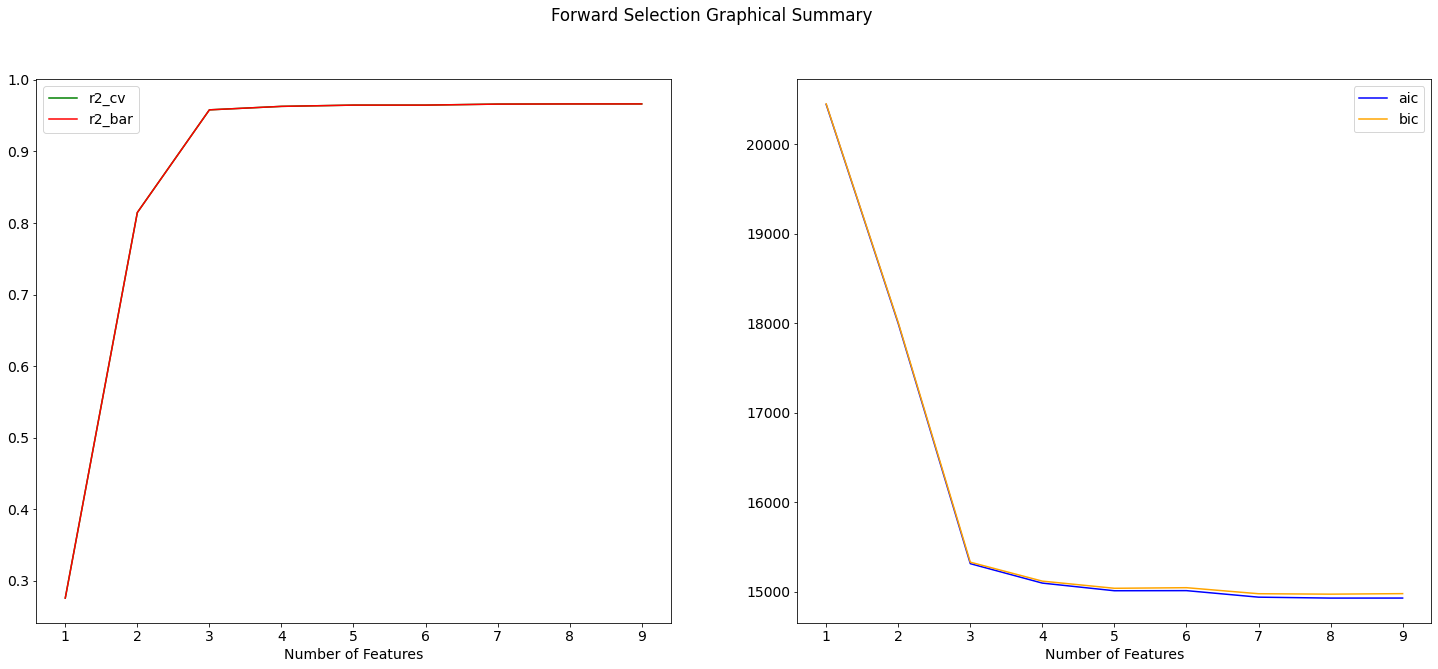

In [20]:
forwardSelection(ridge, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:58:32   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:286: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


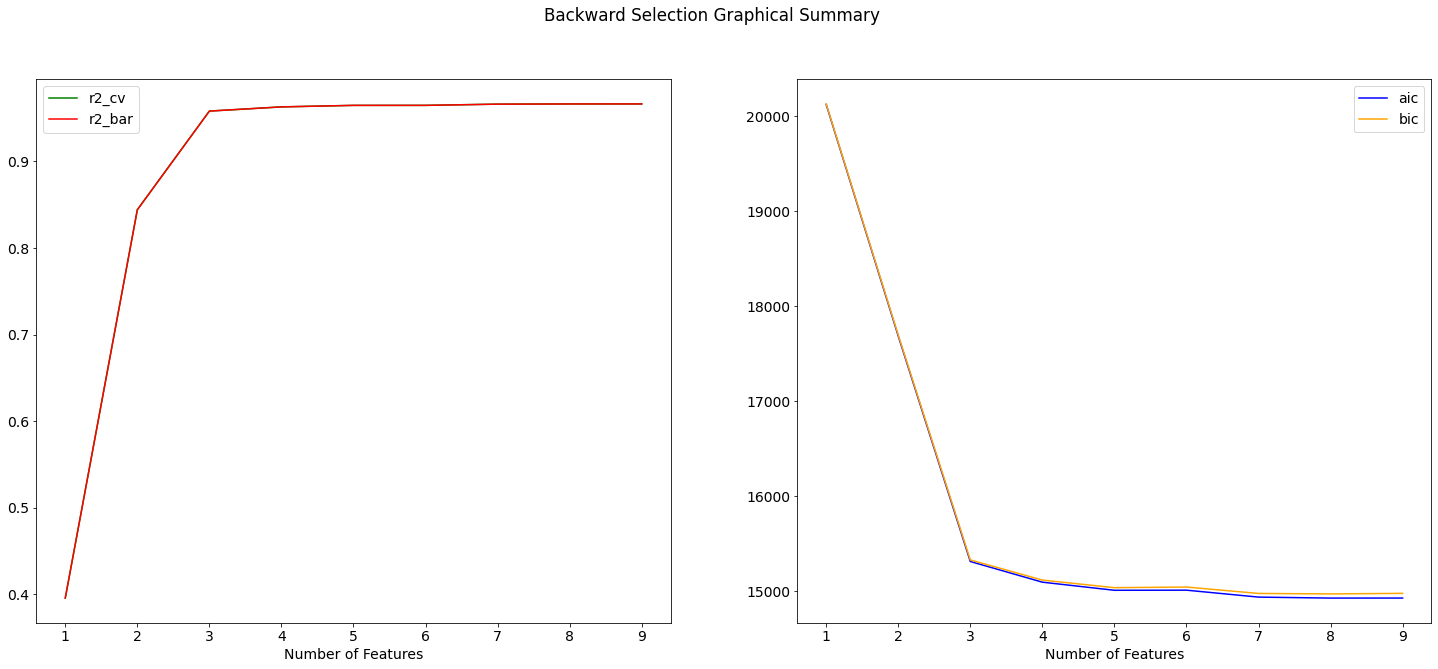

In [21]:
backwardSelection(ridge, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:59:02   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:406: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


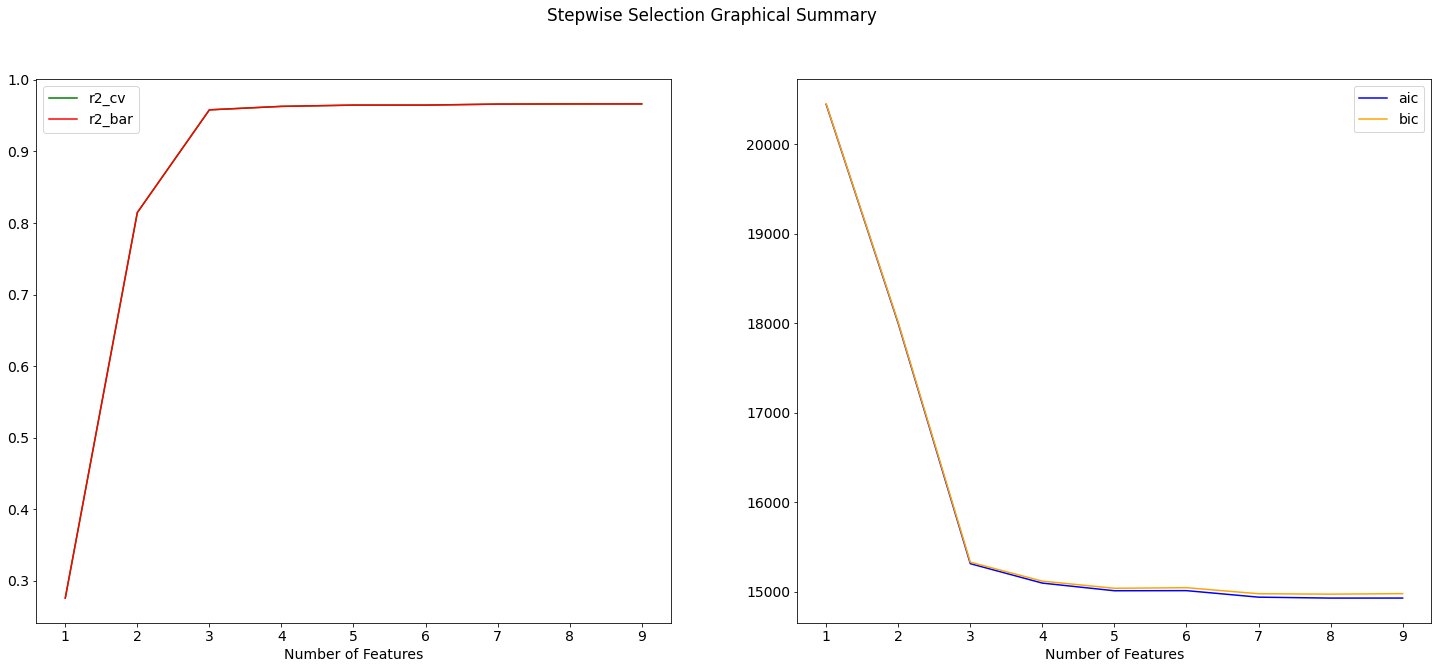

In [22]:
stepwiseSelection(ridge, X, y)

### Lasso Regression

In [23]:
lasso = linear_model.Lasso()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:59:33   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          101

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:184: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


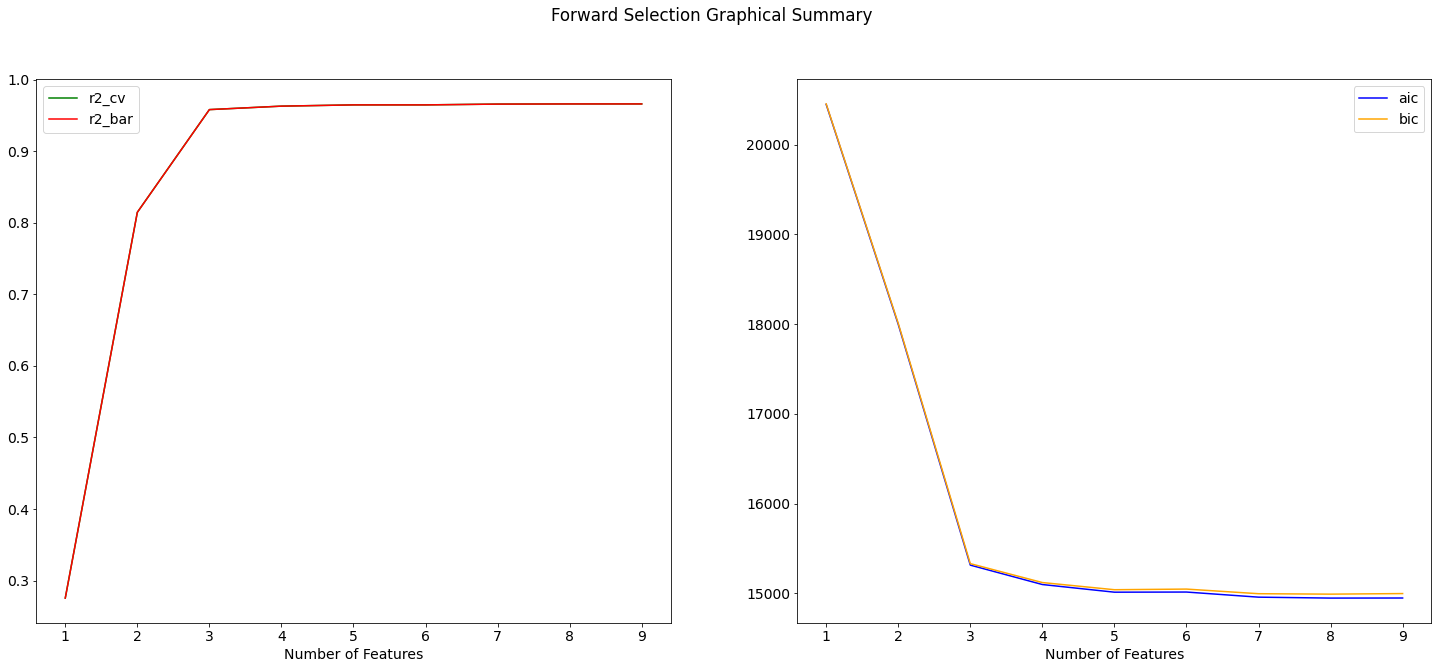

In [24]:
forwardSelection(lasso, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:00:04   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:286: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


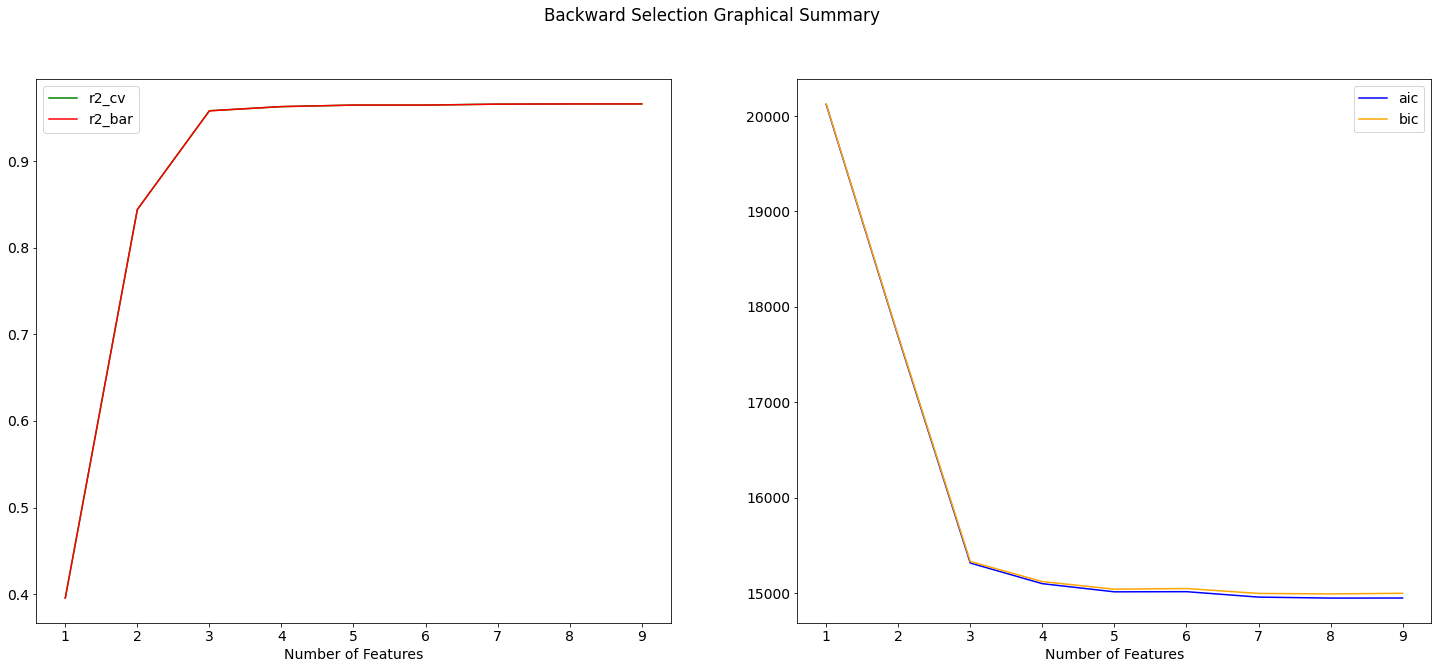

In [25]:
backwardSelection(lasso, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:00:35   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:406: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


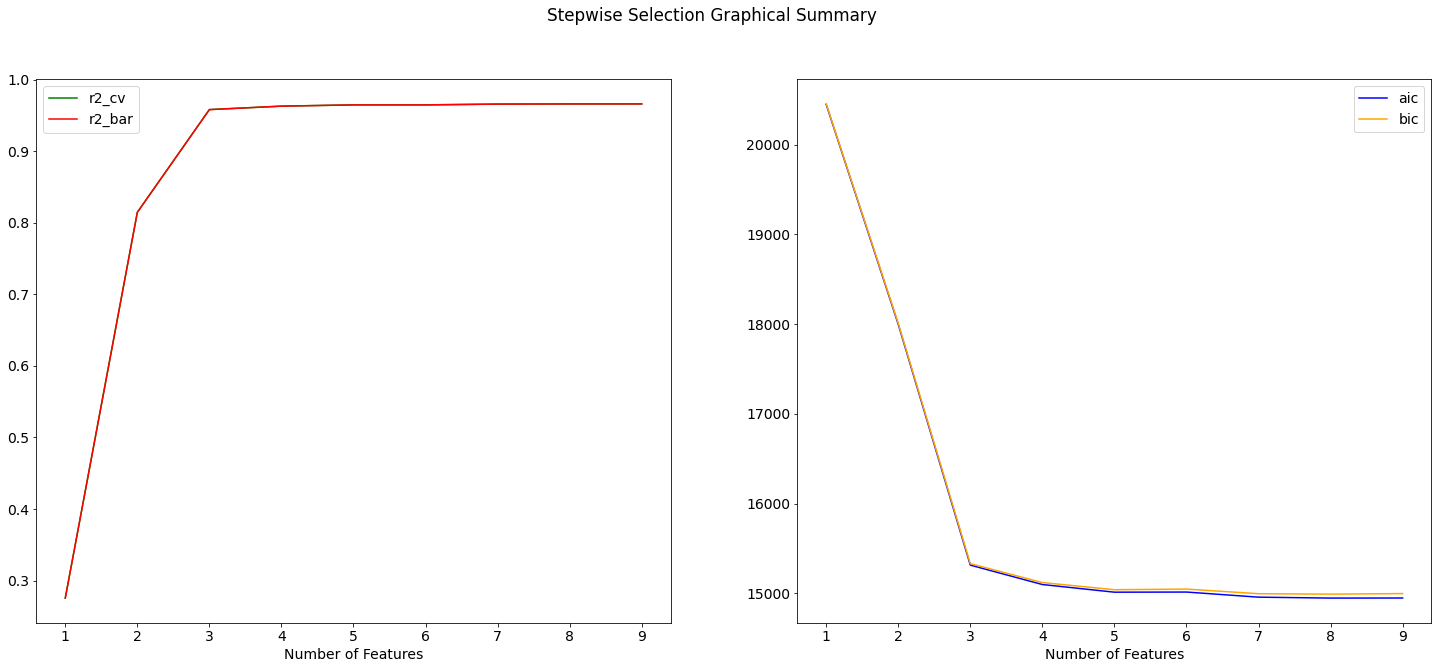

In [26]:
stepwiseSelection(lasso, X, y)

### Symbolic Regression

In [27]:
sym_reg = SymbolicRegressor()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:01:05   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          101

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:184: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


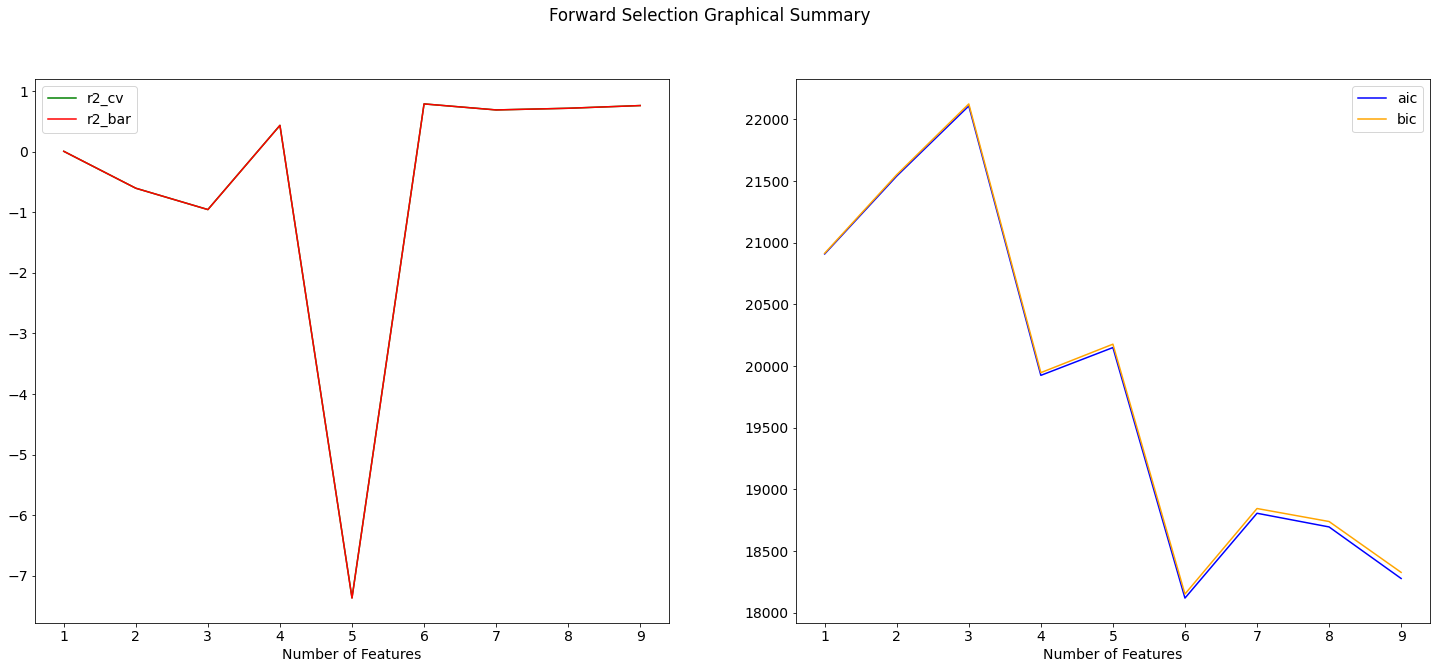

In [28]:
forwardSelection(sym_reg, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:11:27   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:286: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


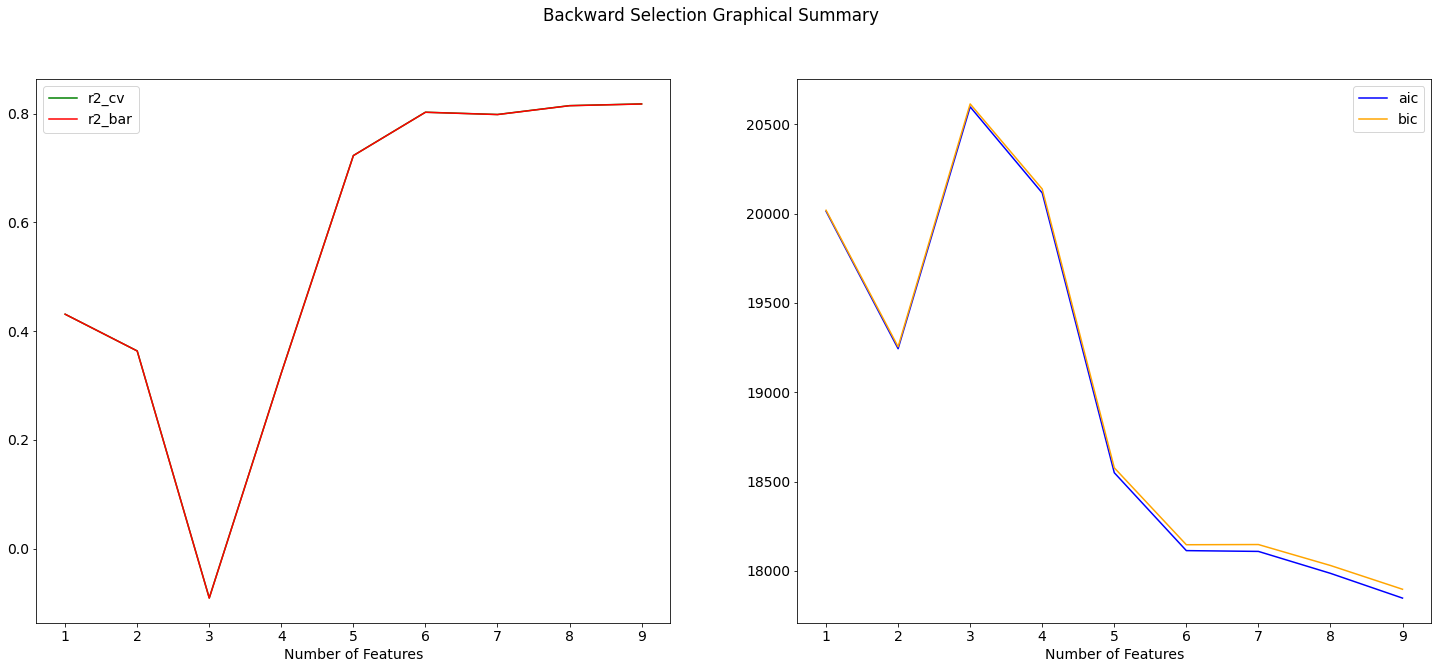

In [29]:
backwardSelection(sym_reg, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.906e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:21:05   Log-Likelihood:                -50020.
No. Observations:                8991   AIC:                         1.001e+05
Df Residuals:                    8981   BIC:                         1.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          10

/Users/sdk/Desktop/UGA_proj/DS2_P1/python/Model_Parent_2.py:406: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


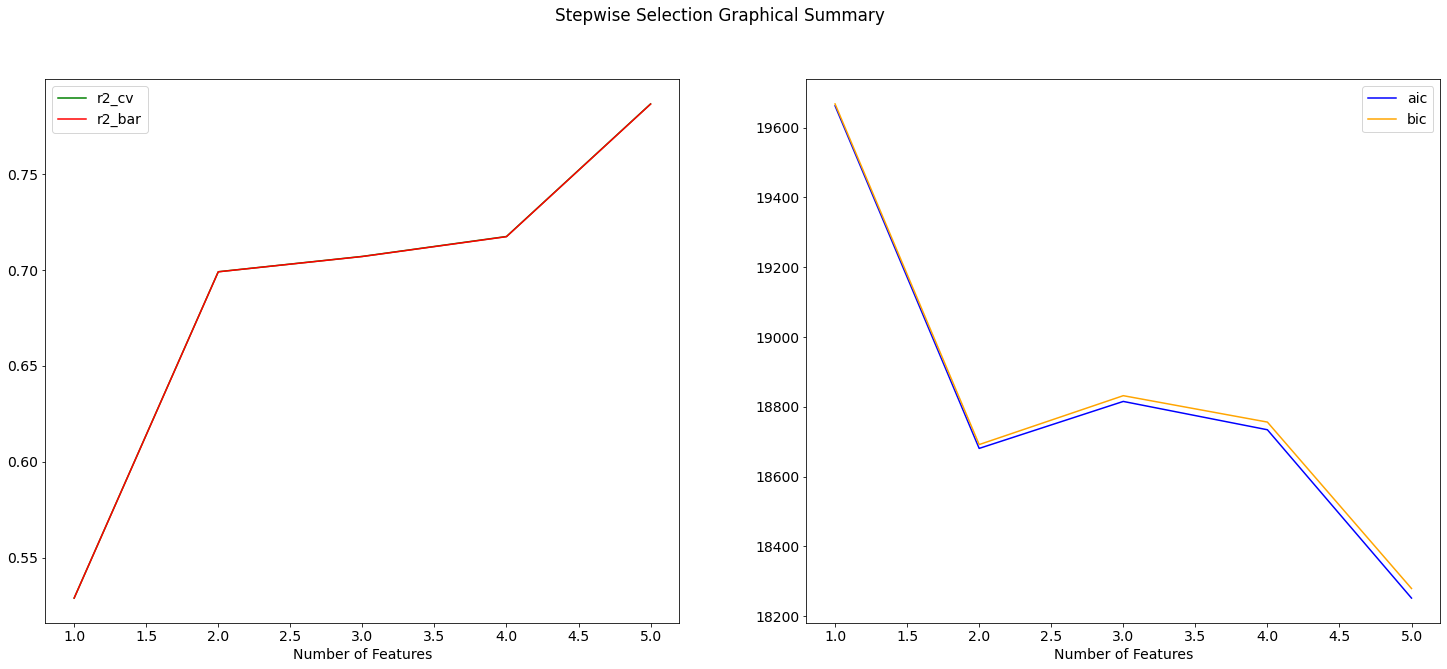

In [30]:
stepwiseSelection(sym_reg, X, y)

### Quadratic Regression

In [31]:
# Not working yet

In [32]:
quad_reg = PolynomialFeatures(degree=2)
X_quad = quad_reg.fit_transform(X)
X_col_names = X.columns.to_list()
X_quad = pd.DataFrame(X_quad)
lr_q = linear_model.LinearRegression()

In [33]:
forwardSelection(lr_q, X_quad, y)


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:           PT08.S4(NO2)   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.463e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:33:26   Log-Likelihood:                -45127.
No. Observations:                8991   AIC:                         9.036e+04
Df Residuals:                    8936   BIC:                         9.076e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            942.7991   

ValueError: Length of values (54) does not match length of index (55)

In [ ]:
backwardSelection(lr_q, X_quad, y)

In [ ]:
stepwiseSelection(lr_q, X_quad, y)

### Cubic Regression

In [ ]:
# Not working yet

In [ ]:
cubic_reg = PolynomialFeatures(degree=3)
X_cubic = cubic_reg.fit_transform(X)
lr_c = linear_model.LinearRegression()

In [ ]:
forwardSelection(lr_c, X_cubic, y)

In [ ]:
backwardSelection(lr_c, X_cubic, y)

In [ ]:
stepwiseSelection(lr_c, X_cubic, y)